In [2]:
#Exploratory Data Analysis Project # 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('All the Intermediate Colleges in Pakistan.csv')

In [3]:
# Overview of the dataset
print("Dataset Overview:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB
Dataset Overview:
 None


In [4]:
df.columns

Index(['Name', 'Location', 'Study Program', 'Sector', 'Affiliation', 'Rating'], dtype='object')

In [5]:
df.dtypes

Name             object
Location         object
Study Program    object
Sector           object
Affiliation      object
Rating           object
dtype: object

In [6]:
df.shape

(1630, 6)

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [8]:
# Basic statistics
print("\nBasic Statistics:\n", df.describe(include='all'))  # Use include='all' to get stats for all columns


Basic Statistics:
                     Name Location  \
count               1630     1626   
unique              1630     1573   
top     Campus.pk Lahore  Chakwal   
freq                   1       11   

                                            Study Program   Sector  \
count                                                1630     1101   
unique                                                774        2   
top     FA ICS Computer Science FSc Pre Medical FSc Pr...  Private   
freq                                                   49      562   

                   Affiliation Rating  
count                      155   1630  
unique                      97     21  
top     University of Sargodha     0*  
freq                         7   1119  


In [9]:
# Unique study programs
print("\nUnique Study Programs:\n", df['Study Program'].unique())


Unique Study Programs:
 ['FSc Pre Engineering Fsc Pre Medical'
 'FSc Pre Engineering ICs Computer Science FSc Pre Medical Higher Secondary School Certificate ( FA - Dars-E-Nazami Group) Higher Secondary School Certificate ( FA - General Group) Icom FA'
 'FSc Pre Engineering ICS Computer Science FSc Pre Medical F.A (Arts) F.A (General Science) I.Com'
 'FSc Pre-Engineering ICS FSc Pre-Medical Icom FA FA General Science'
 'FA Arts FSc Pre Engineering ICS Physics ICS Statistics ICS Economics FSc Pre Medical F.A (Home Economics) F.A (General Science) F.Sc (Applied Psychology) Icom'
 'FSc Pre Agriculture'
 'FSc Pre Engineering ICS ICS Statistics ICS Physics FSc Pre Medical Icom FA Humanities FA General Science'
 'FSc Pre Engineering ICS FSc Pre Medical General Science FA'
 'FSc Pre Engineering ICS Computer Sciecne FSc Pre Medical ICS Statistics ICS Physics Icom FA Arts FA General Science'
 'Fsc Pre Engineering ICS FSc Pre Medical Icom FA'
 'FSc Pre Engineering ICS Computer Science FSc Pre M

In [10]:
# Handling missing values in 'Sector' for analysis
df['Sector'].fillna('Unknown', inplace=True)  # Replace missing values in 'Sector' with 'Unknown'


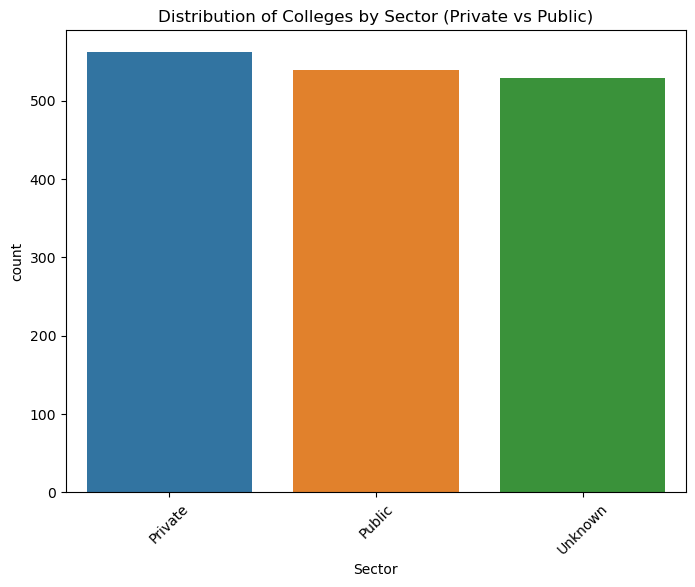

In [11]:
# Analyzing the distribution of Sector (Private vs Public)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sector')
plt.title('Distribution of Colleges by Sector (Private vs Public)')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

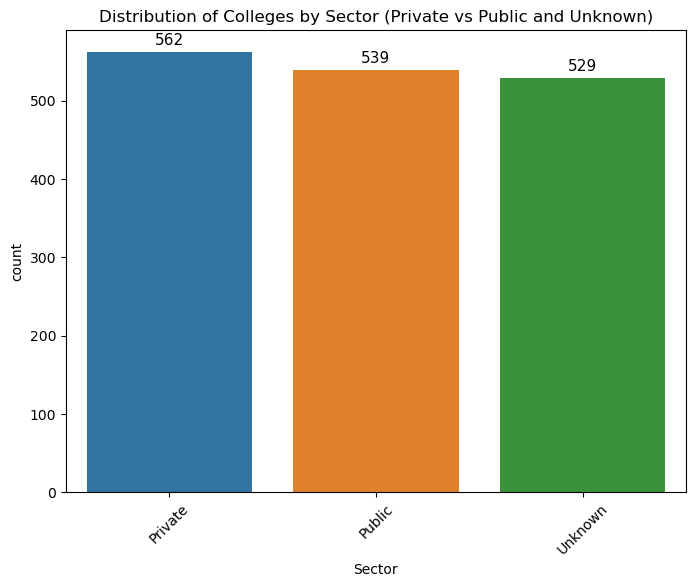

In [12]:
# Analyzing the distribution of Sector (Private vs Public and Unknown)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Sector')
plt.title('Distribution of Colleges by Sector (Private vs Public and Unknown)')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Adding the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


In [13]:
# Handling missing or improper values in 'Rating' column
# First, convert the 'Rating' column to a string type, extract numbers, and convert them back to float
df['Rating'] = df['Rating'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

C:\Users\Mani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


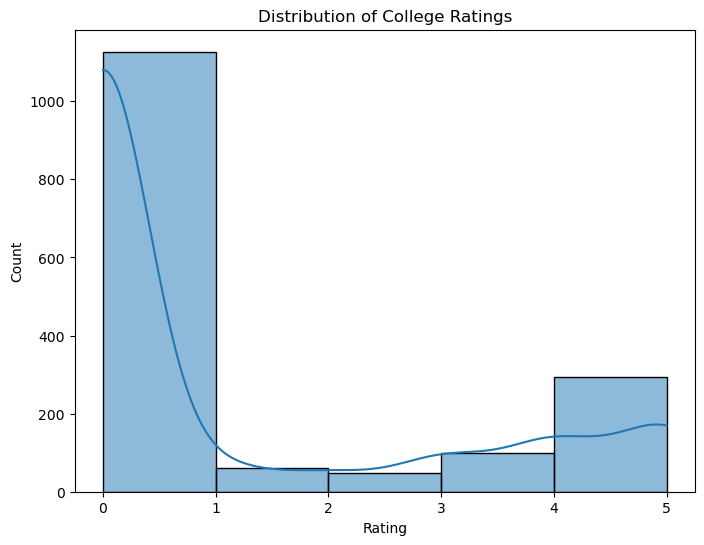

In [14]:
# Analyzing the rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'].dropna(), bins=5, kde=True)
plt.title('Distribution of College Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

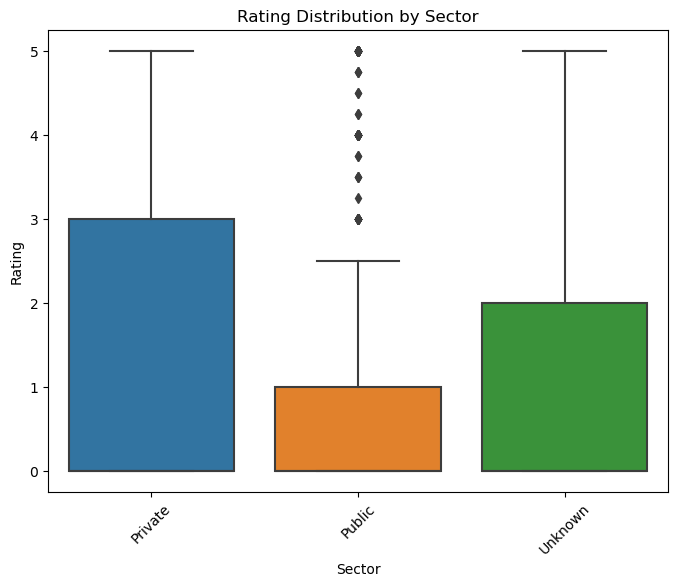

In [15]:
# Correlation between sectors and ratings (drop rows with missing 'Rating')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.dropna(subset=['Rating']), x='Sector', y='Rating')
plt.title('Rating Distribution by Sector')
plt.xticks(rotation=45)
plt.show()

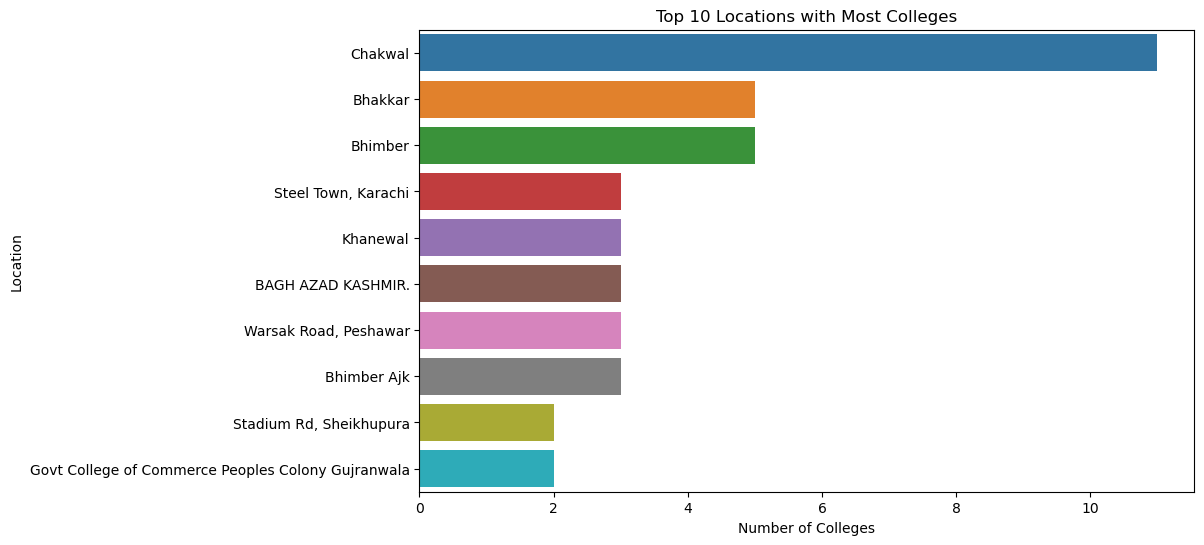

In [16]:
# Top locations with the most colleges
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations with Most Colleges')
plt.xlabel('Number of Colleges')
plt.ylabel('Location')
plt.show()

In [17]:

# Displaying the first few rows to understand the structure of the data
print(df.head())

                                                Name  \
0                                   Campus.pk Lahore   
1        Allama Iqbal Open University Aiou Islamabad   
2           Government College University Gcu Lahore   
3             Govt College University GCU Faisalabad   
4  Lahore College For Women University (Lcwu) Lahore   

                                            Location  \
0  Office 206, 2nd Floor Siddique Trade Center Ma...   
1                        Sector H-8, Islamabad-44000   
2          GC University, Katchery Road Lahore 54000   
3                       Kotwali Rd, Faisalabad 38000   
4                Near Wapda Flats, Jail Road, Lahore   

                                       Study Program   Sector Affiliation  \
0                FSc Pre Engineering Fsc Pre Medical  Private         ads   
1  FSc Pre Engineering ICs Computer Science FSc P...   Public         NaN   
2  FSc Pre Engineering ICS Computer Science FSc P...   Public         HEC   
3  FSc Pre-Enginee